# Preprocessing of Dataset
- Dataset file: "PM_train.txt"

Dataset Column Description (from official dataset data card)
- id
- - "A unique identifier for each data entry."
- cycle
- - "Denotes the operational cycle or period, indicating the stage or duration of engine operation."
- setting1, setting2, setting3
- - "Numerical values representing various operational settings or parameters of the aircraft engine."
- s1 to s21
- - "Numeric sensor readings obtained from 21 different sensors installed on the engine. These readings encompass a range of physical measurements, including but not limited to temperature, pressure, and other relevant parameters."

-------------------------------------------------------------------------------------------------------------------------------------------------------
Dataset loading via .xlsx file type. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Implementation of explicit dtype hinting
dtype_map = {'hours_studied': 'float32', 'previous_scores': 'float32',
             'extra_activities': 'category', 'sleep_hours': 'float32',
             'sample_question': 'float32', 'performance_index': 'float32'}


column_names = ['hours_studied', 'previous_scores', 'extra_activities',
                'sleep_hours', 'sample_question', 'performance_index']

# While the Uber_Fares dataset is massive, I am willing to sacrifice performance to improve accuracy
sp_df = pd.read_csv('../data/dataset_a_s_e_p/Student_Performance/Student_Performance.csv', names=column_names, header=0, dtype=dtype_map)

# Data exploration
print("Print first 20 rows of each column:\n", sp_df.head(20))

print("\nData description:\n")
with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    print(sp_df.describe())

Print first 20 rows of each column:
     hours_studied  previous_scores extra_activities  sleep_hours  \
0             7.0             99.0              Yes          9.0   
1             4.0             82.0               No          4.0   
2             8.0             51.0              Yes          7.0   
3             5.0             52.0              Yes          5.0   
4             7.0             75.0               No          8.0   
5             3.0             78.0               No          9.0   
6             7.0             73.0              Yes          5.0   
7             8.0             45.0              Yes          4.0   
8             5.0             77.0               No          8.0   
9             4.0             89.0               No          4.0   
10            8.0             91.0               No          4.0   
11            8.0             79.0               No          6.0   
12            3.0             47.0               No          9.0   
13         

# Map 'extra_activities' to 0/1

In [42]:
# Standarize values
sp_df['extra_activities'] = (
    sp_df['extra_activities']
        .str.strip()
        .str.lower()
)

# Map 'yes' to 1, 'no' to 0
sp_df['extra_activities'] = sp_df['extra_activities'].map({'yes':1,
                            'no':0}).astype(np.float32)

# one_hot = np.eye(sp_df['extra_activities'].nunique(), dtype=np.float32)[sp_df['extra_activities'].cat.codes]
# X_num = sp_df.drop(columns=['extra_activities']).to_numpy(dtype=np.float32)
# X = np.concatenate([X_num, one_hot], axis=1)

print(sp_df.head(20))

print("\nData description:\n")
with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    print(sp_df.describe())

    hours_studied  previous_scores  extra_activities  sleep_hours  \
0        0.775151         1.704092               1.0     1.456160   
1       -0.383463         0.723877               0.0    -1.492249   
2        1.161356        -1.063574               1.0     0.276797   
3        0.002742        -1.005914               1.0    -0.902567   
4        0.775151         0.320259               0.0     0.866478   
5       -0.769667         0.493238               0.0     1.456160   
6        0.775151         0.204940               1.0    -0.902567   
7        1.161356        -1.409532               1.0    -1.492249   
8        0.002742         0.435579               0.0     0.866478   
9       -0.383463         1.127495               0.0    -1.492249   
10       1.161356         1.242815               0.0    -1.492249   
11       1.161356         0.550898               0.0    -0.312885   
12      -0.769667        -1.294213               0.0     1.456160   
13       0.388947        -1.294213

Verification of 'yes'/'no' 1/0 conversion.

# Feature Scaling: Z-Score Normalization

In [43]:
numeric_columns = ['hours_studied', 'previous_scores', 'sleep_hours', 
                      'sample_question'] # Purposely skips 'extra_activities' as it is already scaled. 
                                        # 'performance_index' isn't scaled as it's the target column.

# Mean/STD calculation
mean = sp_df[numeric_columns].mean()
std = sp_df[numeric_columns].std()

# Standardization of each column
sp_df[numeric_columns] = ((sp_df[numeric_columns] - mean) / std)

# 80/20 Split
Data is pre-shuffled.

In [44]:
# 80% split index
split_index = int(len(sp_df) * 0.8)

# Split of dataframe
train_sp_df = sp_df.iloc[:split_index]
test_sp_df = sp_df.iloc[split_index:]

# Size verification
print(f'Size of Training Set: {len(train_sp_df)}')
print(f'Size of Test Set: {len(test_sp_df)}')

Size of Training Set: 8000
Size of Test Set: 2000


In [45]:
# Data exploration
print("Print first 20 rows of each column:\n", train_sp_df.head(20))

print("\nData description:\n")
with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    print(train_sp_df.describe())

print("\nData description:\n")
with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    print(test_sp_df.describe())

Print first 20 rows of each column:
     hours_studied  previous_scores  extra_activities  sleep_hours  \
0        0.775153         1.704097               1.0     1.456169   
1       -0.383464         0.723879               0.0    -1.492258   
2        1.161359        -1.063576               1.0     0.276798   
3        0.002742        -1.005917               1.0    -0.902572   
4        0.775153         0.320260               0.0     0.866484   
5       -0.769669         0.493240               0.0     1.456169   
6        0.775153         0.204940               1.0    -0.902572   
7        1.161359        -1.409536               1.0    -1.492258   
8        0.002742         0.435580               0.0     0.866484   
9       -0.383464         1.127498               0.0    -1.492258   
10       1.161359         1.242818               0.0    -1.492258   
11       1.161359         0.550900               0.0    -0.312887   
12      -0.769669        -1.294216               0.0     1.456169 

Constants Identified
- Constants, near-constants, and other excluded columns:
  - No constants

In [46]:
# Check for missing data
print("\n Null values: \n", train_sp_df.isnull().sum())

# 100% validity verified
train_sp_df_clean = train_sp_df.copy()


 Null values: 
 hours_studied        0
previous_scores      0
extra_activities     0
sleep_hours          0
sample_question      0
performance_index    0
dtype: int64


In [47]:
# Data exploration/prep of test data
print("\n Null values: \n", test_sp_df.isnull().sum()) # Does not verifies 100% data validity.

# 100% validity verified
test_sp_df_clean = test_sp_df.copy()


 Null values: 
 hours_studied        0
previous_scores      0
extra_activities     0
sleep_hours          0
sample_question      0
performance_index    0
dtype: int64


Test and Train have both been cleaned. 

-------------------------------------------------------------------------------------------------------------------------------------------------------
Dataset normalization via z-score
standarized scaling:
- Centering each feature to zero mean
- Scaling to unit variance

# Z-Score Normalization Complete
- Target columns do not get normalized

# Feature Selection

In [48]:
# Feature columns to ensure only features are normalized
feature_columns = ['hours_studied', 'previous_scores', 'sleep_hours', 'sample_question', 'extra_activities']
# If algorithm performance is not adequeate 'passenger_count' will be removed

print(feature_columns)

['hours_studied', 'previous_scores', 'sleep_hours', 'sample_question', 'extra_activities']


# Implementation of Multi-feature Linear Regression with Batch Gradient Descent

For multi-feature linear regression, the model is:

y = Xw + b

- Where:
- - y = predicted value (vector)
- - X = input data matrix (rows=samples, columns=features)
- - w = weights (vector, one per feature)
- - b = bias/intercept (scalar)

In [49]:
# Prediction function/formula
def predict(X, b, w):
    # X: shape (n_samples, n_features)
    # w: shape (n_features,)
    # b: scalar
    return X.dot(w) + b

Cost function: MSE (Mean Squared Error)

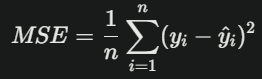


Batch Gradient Descent Update Rule:

θ=θ−η⋅∇J(θ)

- Where:
- - θ: Represents the parameters or weights of the model that you want to optimize.
  - J(θ): Denotes the cost function (or loss function), which measures how well the model is performing given the parameters θ. The goal is to minimize this function.
  - ∇J(θ): Is the gradient of the cost function with respect to the parameters θ. This gradient is a vector that points in the direction of the steepest increase of the cost function.
  - η: Is the learning rate, a small positive scalar that determines the step size taken in the parameter space during each update.

# Run and Set-up of Batch Gradient Descent with Demo Data to Verify Functionality

In [50]:
# Set-up for learning model
# Example: create random (dummy) data for demo purposes
np.random.seed(42)          # .seed() ensures that the random numbers generated are the same each time the program is run
n_samples = 100
n_features = 5
X_demo = np.random.randn(n_samples, n_features)    # Features matrix
weights_true = np.array([1.5, -2.0, 1.0, 1.5, 2])            # True weights (for testing)
y_demo = X_demo @ weights_true + 0.5             # y = Xw + b, with true bias 0.5

In [51]:
# Verify shape of X
print(X_demo.shape)

(100, 5)


In [52]:
def g_d_func(X, y, b_init=0.0, learning_rate=0.05, iterations=1000, w_init=None):
    # Make sure w matches the number of features
    X = np.asarray(X, dtype=np.float32)               # shape (m, n)
    y = np.asarray(y, dtype=np.float32)               # shape (m,)
    n_features = X.shape[1]

    if w_init is None:
        w = np.zeros(n_features, dtype=np.float32)    # (n,)
    else:
        w = np.asarray(w_init, dtype=np.float32)
        assert w.shape == (n_features,), "w_init length must equal n_features"
    
    # Ensures b is able to move around the horizontal plane
    b = float(b_init)
    total_cost = []

    m = len(y)
    for i in range(iterations):
        y_hat = X.dot(w) + b
        error = y_hat - y

        # Compute gradients
        grad_w = (2 / len(X)) * X.T.dot(error)
        grad_b = (2 / len(X)) * error.sum() # Scalar

        # Update parameters
        w -= learning_rate * grad_w
        b -= learning_rate * grad_b

        # Track cost
        mse = (error ** 2).mean()
        total_cost.append(mse)

        if i % 100 == 0:
            print(f"Iter {i:5d}: MSE={mse:.4f}")
    
    print("Final Weights:", w)
    print("Final Bias:", b)
    print("Final Cost:", mse)

    return b, w, total_cost

In [53]:
demo_b, demo_w, demo_total_cost = g_d_func(X=X_demo, y=y_demo, learning_rate=0.01, iterations=410)

Iter     0: MSE=12.3202
Iter   100: MSE=0.3417
Iter   200: MSE=0.0105
Iter   300: MSE=0.0004
Iter   400: MSE=0.0000
Final Weights: [ 1.4972211  -1.9994843   0.99942476  1.4984274   1.9989675 ]
Final Bias: 0.49939203
Final Cost: 9.881327e-06


After fine tuning the learning rate and number of iterations, it appears 410 iterations and a learning rate of 0.01 is appropriate for the training data. 

Text(0, 0.5, 'Cost')

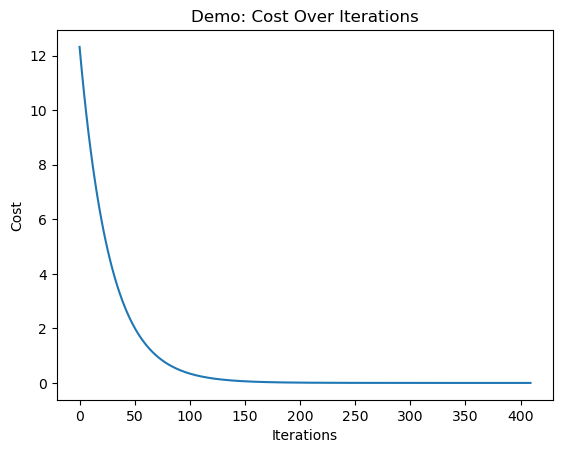

In [58]:
sns.lineplot(demo_total_cost)
plt.title('Demo: Cost Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')

Multi-feature gradient descent functionality has been verified with demo data. 

# Train Based Off Training Data

# Selection of Feature and Target Data

Conversion of Data to Numpy Arrays of Training

In [55]:
train_feature_data = train_sp_df_clean[feature_columns]
train_target_data = train_sp_df_clean['performance_index']

X_train = train_feature_data.to_numpy()
y_train = train_target_data.to_numpy()



test_feature_data = train_sp_df_clean[feature_columns]
test_target_data = train_sp_df_clean['performance_index']

X_test = test_feature_data.to_numpy()
y_test = test_target_data.to_numpy()

In [57]:
training_b, training_w, training_total_cost = g_d_func(X=X_train, y=y_train, learning_rate=0.2005, iterations=300)

Iter     0: MSE=3413.6626
Iter   100: MSE=4.1281
Iter   200: MSE=4.1281
Final Weights: [ 7.383329   17.655664    0.80412203  0.54880226  0.6313155 ]
Final Bias: 54.897923
Final Cost: 4.128055


# Pre-Fine-Tuning

training_b, training_w, training_total_cost = g_d_funct(X=X_train, y=y_train, b=11.4, learning_rate=0.055, iterations=200)

- Final cost
  - 96.62712858097716
- Final weights:
  - Column: pickup_longitude
    - 0.02357451
  - Column: pickup_latitude
    - -0.00584683
  - Column: dropoff_longitude
    - -0.04786046
  - Column: dropoff_latitude
    - -0.1279973
  - Column: passenger_count
    - 0.07033576
- Final bias:
  - 11.36006331289872

# Post-Fine-Tuning
Batch Multi-variate Gradient Descent converged at:
- Bias: 75.15
- Learning Rate: 0.1069
- Iterations: 520

Text(0, 0.5, 'Cost')

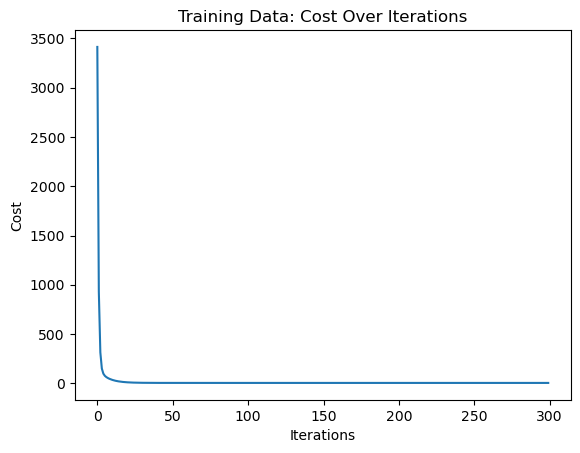

In [59]:
sns.lineplot(training_total_cost)
plt.title('Training Data: Cost Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')

# Create X_test and y_test

# Predict Actual Data with 'training_b' and 'training_w' 

In [61]:
# # Use predict function to test final 'w' and 'b' values
# y_pred_test = predict(X_test, training_w, training_b)

# # Calculate MSE (Mean Squared Error)
# mse = np.mean((y_test - y_pred_test) ** 2)

# # Calculate RMSE (Root Mean Squared Error)
# rmse = np.sqrt(mse) # Puts MSE back into the root unit. Increases readablility.

# print(f'Test RMSE: {rmse:.4f}')

# 1. Ensure w is 1-D and X·w returns (m,)
training_w = training_w.ravel()              # shape (n_features,)
y_pred_test = X_test.dot(training_w) + training_b  # (m,)

# 2. Compute MSE and RMSE safely
error = y_test - y_pred_test                 # both (m,)
mse = (error ** 2).mean()
rmse = np.sqrt(mse)
print(f"Test RMSE: {rmse:.4f}")

Test RMSE: 2.0318


In order to guage the accuracy of my Mult-Variate Gradient Descent algorithm, I need to compare the RMSE with the std of my target variables.

Standard deviation (std) of target variables:
- 19.2

RMSE of prediction:
- 2.0318

Relative RMSE = RMSE / std (target)
- 0.1058

<!-- Unfortunately, this indicates that while my Multi-Variate Batch Gradient Desent model is accurate and functional, it is currently useless because it is not out performing the standard deviation of the target. -->

# Feature Engineering and Fine-Tuning

# LASSO Regression from scratch adaptation (Cost Function)

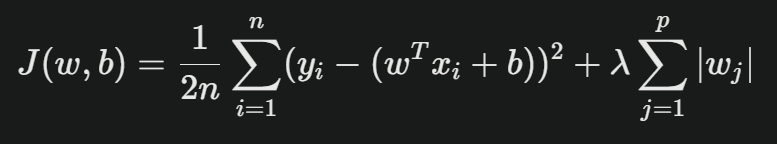

(AKA: L1-regularized least squares cost function)

Where
- b = bias
- lambda = regularization strength

In [142]:
# In order to implement LASSO Regression from scratch, I will be creating a new function that is specifically designed around the advancement.

def lasso_batch_gradient_descent(X, y, learning_rate=0.01, b_init=0.0, lambda_=0.1, iterations=1000):
    n_samples, n_features = X.shape
    w = np.random.randn(n_features) * .000005
    cost_history = []
    b = b_init
    
    for i_1 in range(iterations):
        y_pred = X.dot(w) + b
        residual = y - y_pred

        # Gradients
        dw = (-1/n_samples) * X.T.dot(residual) + lambda_ * np.sign(w)
        db = (-1/n_samples) * np.sum(residual)

        # Update rules
        w -= learning_rate * dw
        b -= learning_rate * db

        # Calculate cost
        cost = (1 / (2 * n_samples) * np.sum(residual ** 2) + lambda_ * np.sum(np.abs(w)))
        cost_history.append(cost)
        
        # Print progress every 10 iterations
        if i_1 % 10 == 0:
            print(f"Iteration: {i_1}: Cost={cost:.4f}")
    
    print("Final Weights:", w)
    print("Final Bias:", b)
    print("Final Cost:", cost)

    return w, b, cost_history

In [144]:
# Calling lasso_batch_gradient_descent with training data
training_w_lasso, training_b_lasso, training_cost_history_lasso = lasso_batch_gradient_descent(
    X_train, y_train, learning_rate=0.999999999, b_init=19.2, lambda_=.00000000095, iterations=50)

Iteration: 0: Cost=831.9064
Iteration: 10: Cost=2.5033
Iteration: 20: Cost=2.0702
Iteration: 30: Cost=2.0641
Iteration: 40: Cost=2.0640
Final Weights: [ 7.38332849 17.65566392  0.80412502  0.54879879  0.63166307]
Final Bias: 54.897714450498704
Final Cost: 2.0640273688013755


training_w_lasso, training_b_lasso, training_cost_history_lasso = lasso_batch_gradient_descent(
    X_train, y_train, learning_rate=0.999999999, b_init=19.2, lambda_=.00000000095, iterations=100)

Final Iteration: 40
Final Weights: [ 7.38332908 17.65566528  0.80412192  0.54880244  0.63130643]
Final Bias: 54.89793146173681
Final Cost: 2.0640273431168024

Text(0, 0.5, 'Cost')

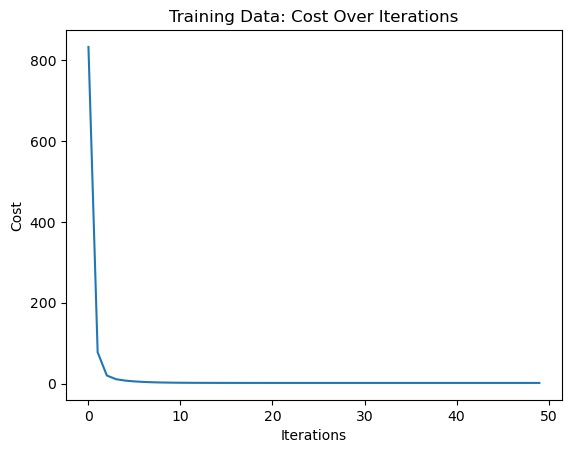

In [145]:
sns.lineplot(training_cost_history_lasso)
plt.title('Training Data: Cost Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')

In [151]:
y_hat = predict(X_test, training_b, training_w)
rmse  = np.sqrt(np.mean((y_test - y_hat)**2))
mae   = np.mean(np.abs(y_test - y_hat))
r2    = 1 - np.sum((y_test - y_hat)**2) / np.sum((y_test - y_test.mean())**2)
print(f" RMSE {rmse:,.4f} | MAE {mae:,.4f} | R² {r2:.4f}")

 RMSE 2.0318 | MAE 1.6135 | R² 0.9888


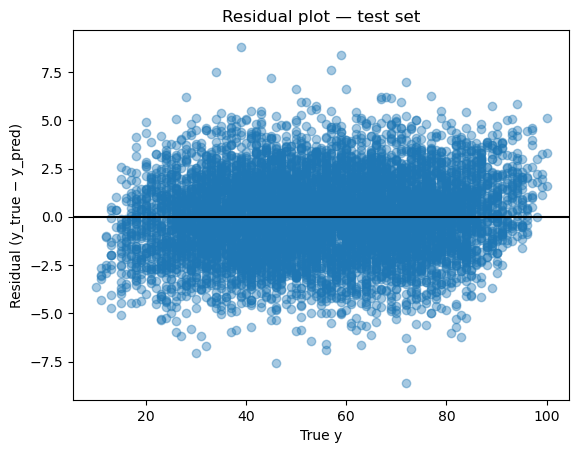

In [147]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_test - y_pred_test, alpha=0.4)
plt.axhline(0, color="k")
plt.xlabel("True y")
plt.ylabel("Residual (y_true − y_pred)")
plt.title("Residual plot — test set")
plt.show()

# Project Has Failed

- Reasons why
  - I failed to understand my data beforehand. This problem was clearly a non-linear problem that I then tried to use two different linear algoriths on. This is my mistake, and now I am starting fresh with a new dataset that I can ensure is compatible with a linear algorithm. 